### Assignment
Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. 
Ten biological attributes of the cancer cell nuclei have been calculated from the images.

In [1]:
import pandas as pd
# import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
cancer = pd.read_csv("cancer.data", header = None)

In [3]:
# changing index cols with rename() 
cancer = cancer.rename(columns = {"0": "Sample_code_number", 
                                  "1": "Clump_Thickness", 
                                  "2": "Uniformity_of_Cell_Size",
                                  "3": "Uniformity_of_Cell_Shape",
                                  "4": "Marginal_Adhesion",
                                  "5": "Single_Epithelial_Cell_Size",
                                  "6": "Bare_Nuclei",
                                  "7": "Bland_Chromatin",
                                  "8": "Normal_Nucleoli",
                                  "9": "Mitoses",
                                  "10": "Class"}) 
  
# changing columns using .columns() 
cancer.columns = ["Sample_code_number", 
                     "Clump_Thickness", 
                     "Uniformity_of_Cell_Size", 
                     "Uniformity_of_Cell_Shape", 
                     "Marginal_Adhesion", 
                     "Single_Epithelial_Cell_Size", 
                     "Bare_Nuclei", 
                     "Bland_Chromatin", 
                     "Normal_Nucleoli", 
                     "Mitoses", 
                     "Class"]
cancer.columns

Index(['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [5]:
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cancer:
    if cancer[col].dtype == 'object':
        cancer[col] = le.fit_transform(cancer[col])

In [6]:
cancer["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [7]:
cancer.groupby("Class").mean()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,,
2,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,0.707424,2.100437,1.290393,1.063319
4,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,2.767635,5.979253,5.863071,2.589212


Text(0, 0.5, 'Classification Frequency')

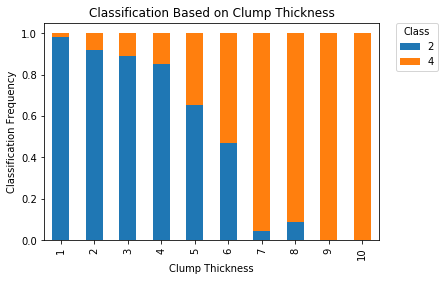

In [8]:
table_1 = pd.crosstab(cancer["Clump_Thickness"], cancer["Class"])
table_1.div(table_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Classification Based on Clump Thickness')
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel('Clump Thickness')
plt.ylabel('Classification Frequency')

Text(0, 0.5, 'Classification Frequency')

<Figure size 864x360 with 0 Axes>

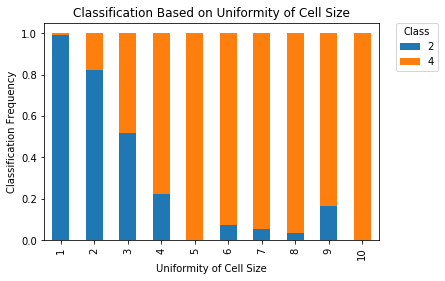

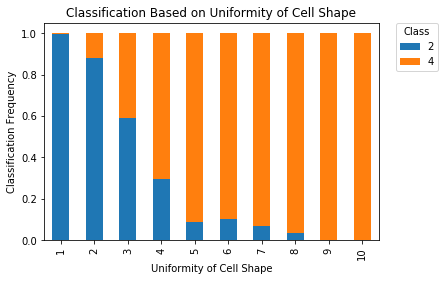

In [9]:
table1 = pd.crosstab(cancer["Uniformity_of_Cell_Size"], cancer["Class"])
table2 = pd.crosstab(cancer["Uniformity_of_Cell_Shape"], cancer["Class"])

fig, ax = plt.subplots(1, 0, figsize = (12, 5))
table1.div(table1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Uniformity of Cell Size")
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Classification Frequency')

table2.div(table2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Uniformity of Cell Shape")
plt.xlabel('Uniformity of Cell Shape')
plt.ylabel('Classification Frequency')

Text(0, 0.5, 'Classification Frequency')

<Figure size 864x360 with 0 Axes>

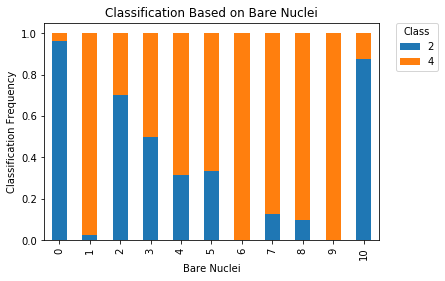

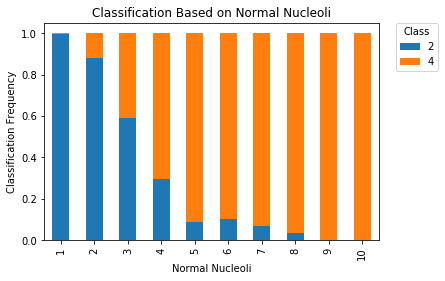

In [10]:
table3 = pd.crosstab(cancer["Bare_Nuclei"], cancer["Class"])
table4 = pd.crosstab(cancer["Normal_Nucleoli"], cancer["Class"])

fig, ax = plt.subplots(1, 0, figsize = (12, 5))
table3.div(table3.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Bare Nuclei")
plt.xlabel('Bare Nuclei')
plt.ylabel('Classification Frequency')

table2.div(table2.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Normal Nucleoli")
plt.xlabel('Normal Nucleoli')
plt.ylabel('Classification Frequency')

Text(0, 0.5, 'Classification Frequency')

<Figure size 864x360 with 0 Axes>

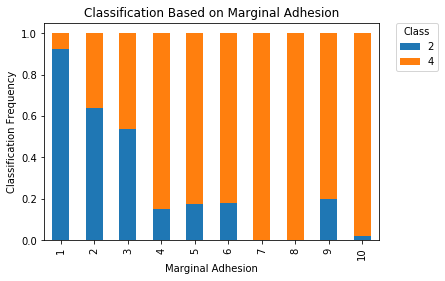

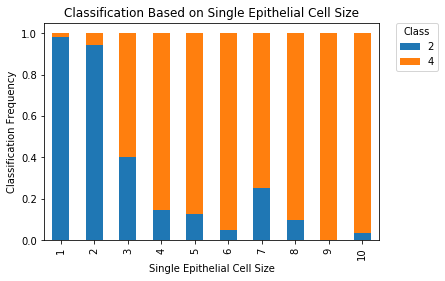

In [11]:
table5 = pd.crosstab(cancer["Marginal_Adhesion"], cancer["Class"])
table6 = pd.crosstab(cancer["Single_Epithelial_Cell_Size"], cancer["Class"])

fig, ax = plt.subplots(1, 0, figsize = (12, 5))
table5.div(table5.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Marginal Adhesion")
plt.xlabel('Marginal Adhesion')
plt.ylabel('Classification Frequency')

table6.div(table6.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Single Epithelial Cell Size")
plt.xlabel('Single Epithelial Cell Size')
plt.ylabel('Classification Frequency')

Text(0, 0.5, 'Classification Frequency')

<Figure size 864x360 with 0 Axes>

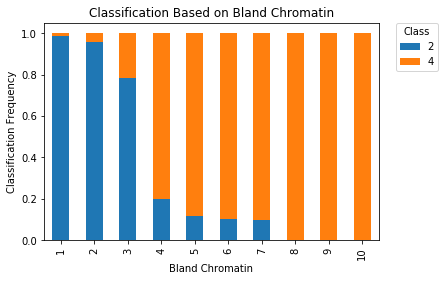

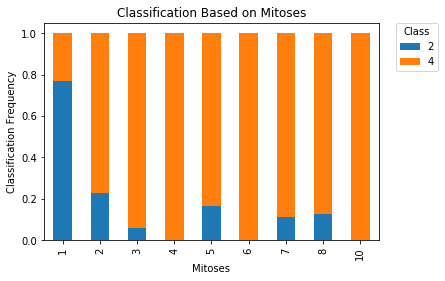

In [12]:
table7 = pd.crosstab(cancer["Bland_Chromatin"], cancer["Class"])
table8 = pd.crosstab(cancer["Mitoses"], cancer["Class"])

fig, ax = plt.subplots(1, 0, figsize = (12, 5))
table7.div(table7.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Bland Chromatin")
plt.xlabel('Bland Chromatin')
plt.ylabel('Classification Frequency')

table8.div(table8.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.legend(title = 'Class', bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title("Classification Based on Mitoses")
plt.xlabel('Mitoses')
plt.ylabel('Classification Frequency')

In [13]:
# Creating the target variable for the test and training sets of data
X = cancer.drop('Class', axis = 1)
y = cancer["Class"]

# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Printing the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.9714285714285714


array([[135,   2],
       [  4,  69]])

In [15]:
# Define the grid of values for tol and max_iter
tol = ([0.01, 0.001, 0.0001])
max_iter = ([100, 150, 200])

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X_train)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.948832 using {'max_iter': 100, 'tol': 0.01}
